In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
# import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

/home/fzg/anaconda3/envs/TSmodel/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
df=pd.read_csv('datasets/data/LD2011_2014.txt', sep=';', index_col=0, parse_dates=True, decimal=',')
# df

In [3]:
# df.columns

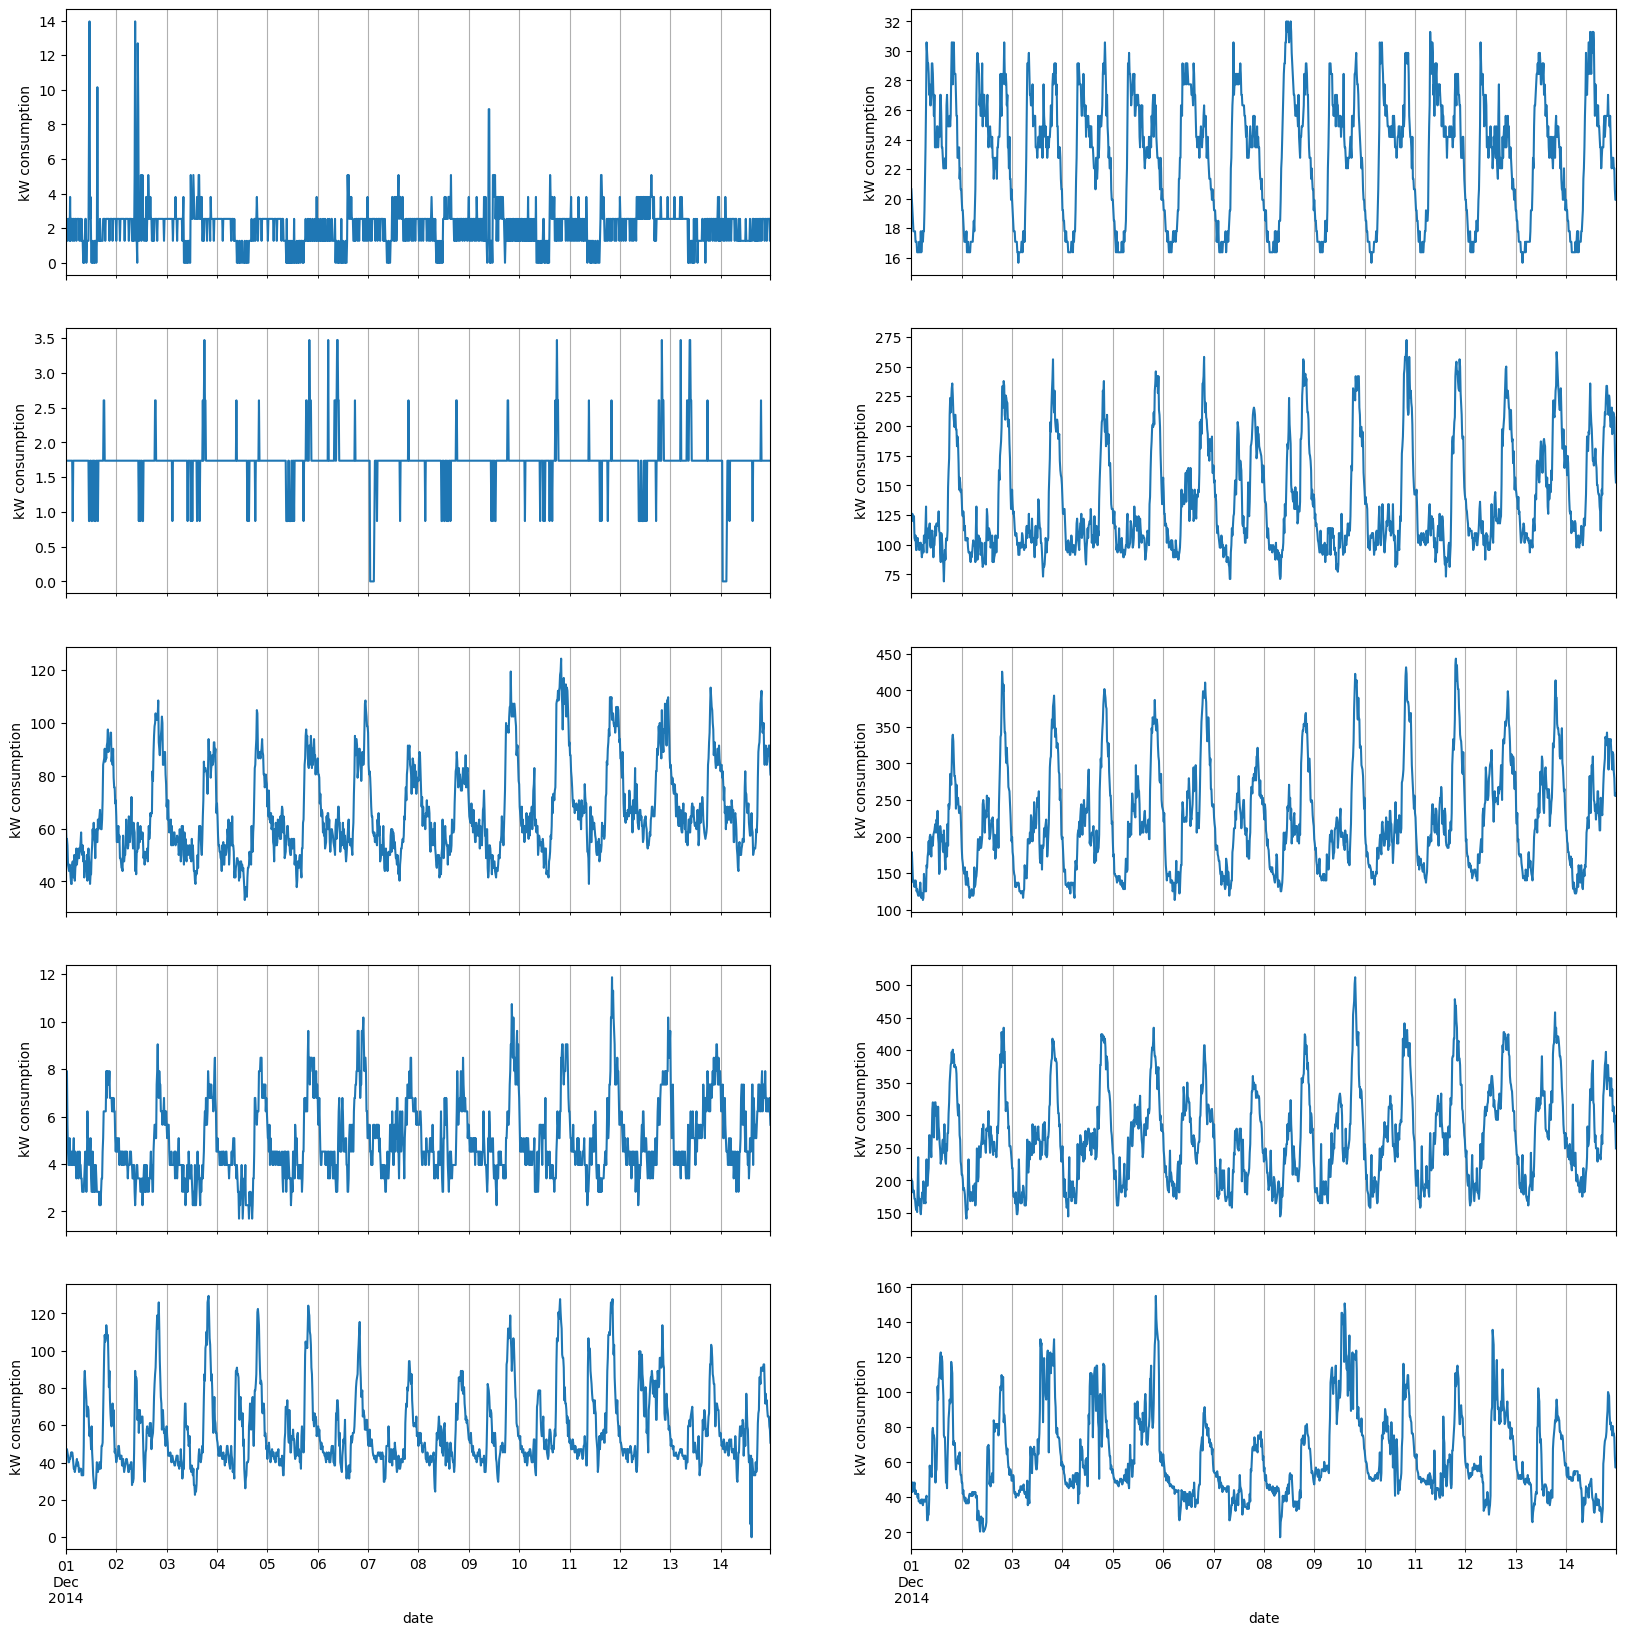

In [4]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 10):
    df[df.columns[i]].loc["2014-12-01":"2014-12-14"].plot(ax=axx[i])
    axx[i].set_xlabel("date")
    axx[i].set_ylabel("kW consumption")
    axx[i].grid(which='minor', axis='x')

In [5]:
df_input=df.reset_index(drop=True).T.reset_index()
df_input

,index,0,1,2,3,4,5,6,7,8,...,140246,140247,140248,140249,140250,140251,140252,140253,140254,140255
0,MT_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071
1,MT_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.048364,22.048364,22.048364,22.048364,22.048364,22.048364,21.337127,20.625889,21.337127,19.914651
2,MT_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619
3,MT_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.504065,164.634146,160.569106,162.601626,156.504065,150.406504,166.666667,162.601626,166.666667,178.861789
4,MT_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.585366,93.902439,87.804878,80.487805,85.365854,85.365854,81.707317,82.926829,85.365854,84.146341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MT_366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.510825,6.436513,11.702750,8.191925,4.681100,5.851375,9.947338,9.362200,4.095963,4.095963
366,MT_367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,546.971027,521.510097,672.519754,719.051800,707.638279,697.102722,671.641791,670.763828,664.618086,628.621598
367,MT_368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,185.308848,173.622705,213.689482,205.342237,188.647746,176.961603,168.614357,153.589316,146.911519,131.886477
368,MT_369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,653.958944,658.357771,711.876833,694.281525,652.492669,651.026393,669.354839,670.087977,646.627566,673.020528


In [6]:
ts_code=df_input["index"].astype('category').cat.codes.values
# ts_code

In [7]:
# df_input

In [8]:
df_train=df_input.iloc[:,1:134999].values
df_test=df_input.iloc[:,134999:].values
# df_train.shape
# df_test.shape

In [9]:
freq="15min"
start_train = pd.Timestamp("2011-01-01 00:15:00", unit=freq)
start_test = pd.Timestamp("2014-11-07 05:30:00", unit=freq)
prediction_lentgh=672

In [10]:
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.model.transformer import TransformerEstimator
from gluonts.mx.model.deep_factor import DeepFactorEstimator
from gluonts.mx.model.deepstate import DeepStateEstimator
from gluonts.mx.model.gp_forecaster import GaussianProcessEstimator
from gluonts.mx.model.n_beats import NBEATSEnsembleEstimator
from gluonts.model.npts import NPTSPredictor
from gluonts.ext.r_forecast import RForecastPredictor

deepar = DeepAREstimator(freq=freq,
                            context_length=672,
                            prediction_length=prediction_lentgh,
                            use_feat_static_cat=True,
                            cardinality=[1],
                            num_layers=3,
                            num_cells=32,
                            cell_type='lstm',
                            trainer=Trainer(epochs=5))
# deepar, transformer, deep_factor, deepstate, gp_forecaster, n_beats, npts,

In [12]:
# df_train[0:7]

In [13]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

train_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_train,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_train[0:7],
                             ts_code[0:7].reshape(-1,1))
], freq=freq)

test_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_test,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_test[0:7],
                            ts_code[0:7].reshape(-1,1))
], freq=freq)

In [14]:
next(iter(train_ds))

{'target': array([0.       , 0.       , 0.       , ..., 2.5380712, 2.5380712,
        1.2690356], dtype=float32),
 'start': Period('2011-01-01 00:15', '15min'),
 'feat_static_cat': array([0], dtype=int32)}

In [15]:
# deepar, transformer, deep_factor, deepstate, gp_forecaster, n_beats, npts,
import mxnet as mx
import gc
from pathlib import Path
from mxnet import gluon
print("Start Train DeepAR...")
predictor_deepar = deepar.train(training_data=train_ds)
save_path = "model_deepar"
# 确保保存路径存在
save_dir = Path("models/{}/".format(save_path))
save_dir.mkdir(parents=True, exist_ok=True)  # 自动创建目录（包括父目录）
# 保存模型
predictor_deepar.serialize(save_dir)
# 加载模型
# predictor_deepar.deserialize(Path("models/{}/".format(save_path)))

print("Finish Train DeepAR")


Start Train DeepAR...


[16:20:38] /work/mxnet/src/base.cc:79: cuDNN lib mismatch: linked-against version 8400 != compiled-against version 8401.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.
100%|██████████| 50/50 [01:30<00:00,  1.80s/it, epoch=5/5, avg_epoch_loss=2.29]


Finish Train DeepAR


In [16]:
from gluonts.evaluation.backtest import make_evaluation_predictions
predictor_deepar.deserialize(Path("models/{}/".format(save_path)))
forecast_it_deepar, ts_it_deepar = make_evaluation_predictions(
    dataset=test_ds,
    predictor=predictor_deepar,
    num_samples=100,
)

In [17]:
from tqdm.autonotebook import tqdm

# --------------------------------------------------------
print("Obtaining time series conditioning values ...")
tss = list(tqdm(ts_it_deepar, total=len(df_test)))
print("Obtaining time series predictions ...")
forecasts = list(tqdm(forecast_it_deepar, total=len(df_test)))


Obtaining time series conditioning values ...


/tmp/ipykernel_37141/3449167077.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/370 [00:00<?, ?it/s]

Obtaining time series predictions ...


  0%|          | 0/370 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

(5258, 1)


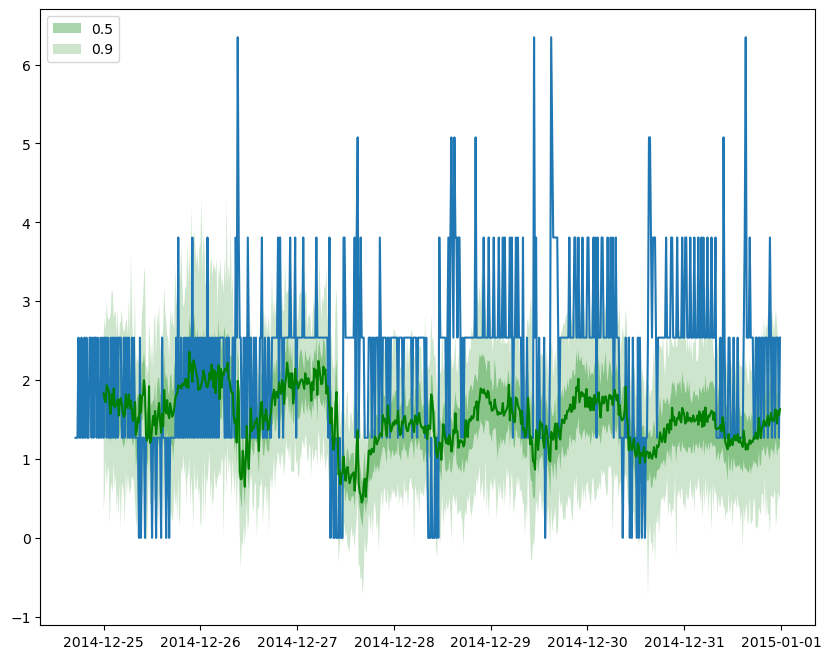

(5258, 1)


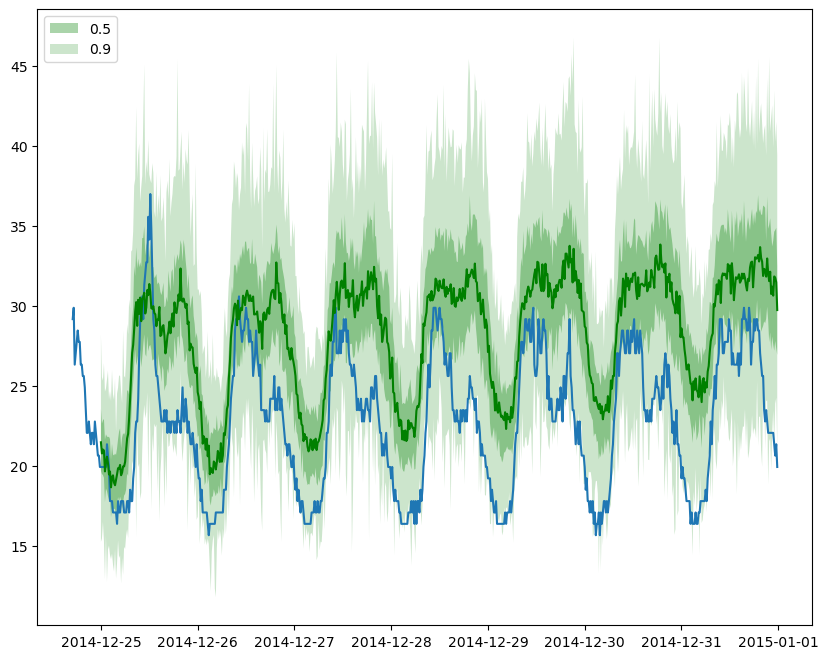

(5258, 1)


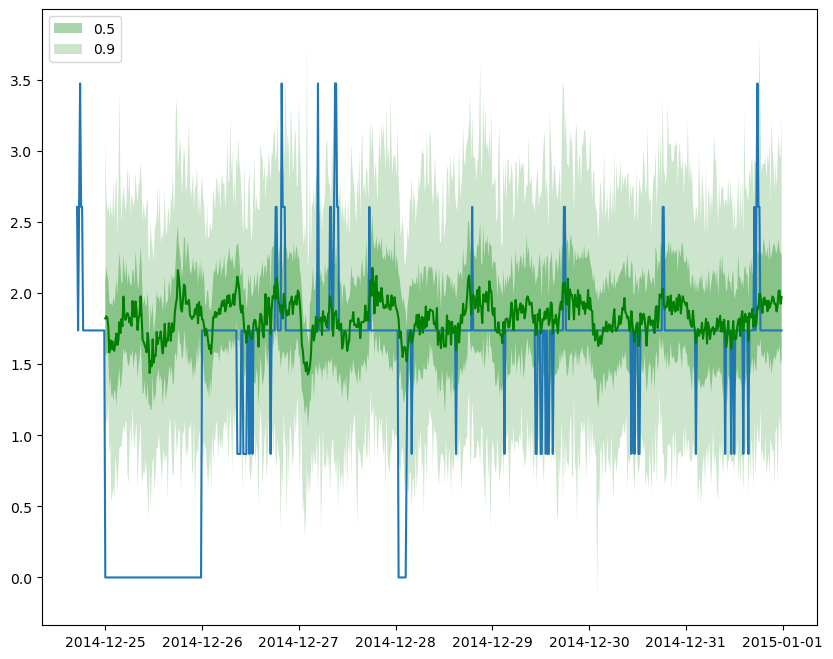

(5258, 1)


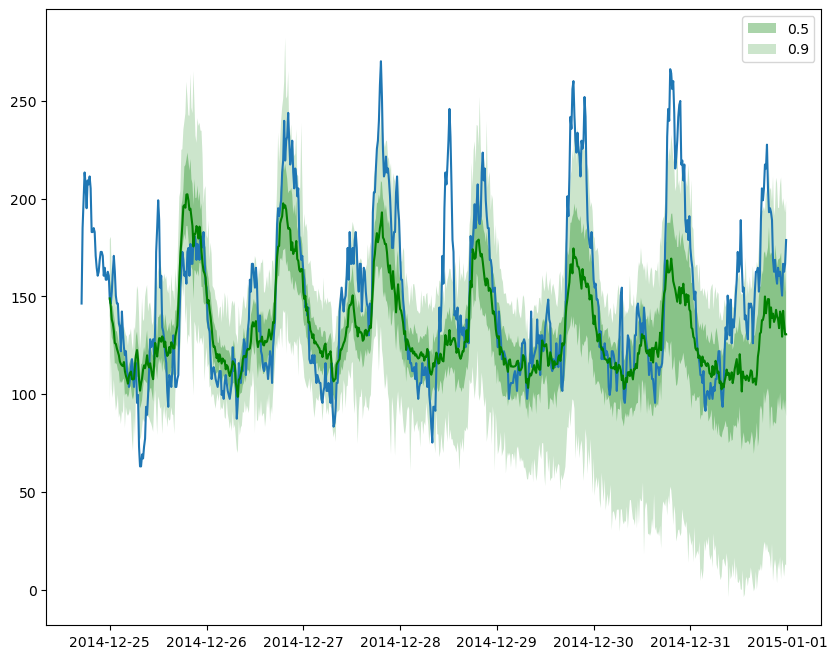

(5258, 1)


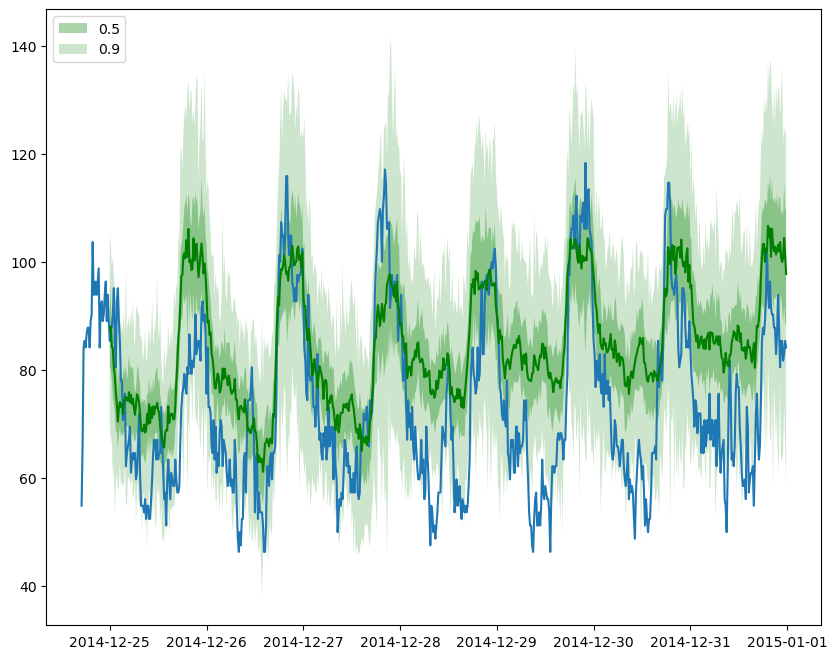

(5258, 1)


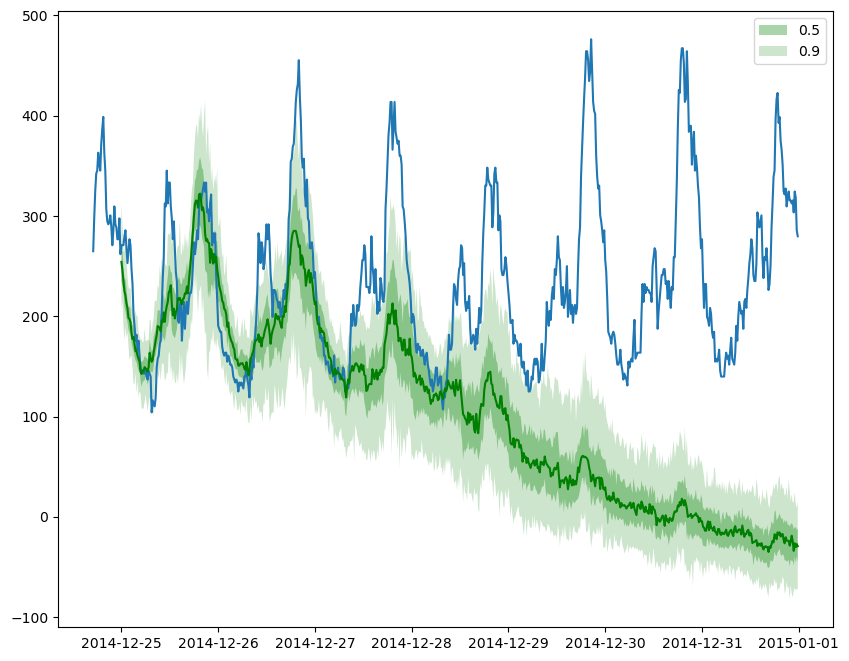

In [18]:
for i in tqdm(range(6)):
    ts_entry = tss[i]
    print(ts_entry.shape)
    plt.plot(ts_entry[-700:].to_timestamp())
    forecast_entry = forecasts[i]
    # print(forecast_entry.shape)
    forecast_entry.plot(show_label=True, color='g')
    plt.legend()
    plt.show()


In [19]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(df_test[0:7]))
item_metrics

Running evaluation: 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]


,item_id,forecast_start,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,num_masked_target_values,ND,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,None,2014-12-25 00:00,1.679314,688.861267,1513.959351,2.252916,0.931286,1.100727,0.381857,0.550821,0.0,0.455006,11.870954,241.666777,0.053571,688.861278,0.261905,551.473710,0.482143
1,None,2014-12-25 00:00,35.043785,3659.609375,15320.056641,22.797703,1.305572,4.171234,0.254615,0.220368,0.0,0.238877,18.197487,1118.864829,0.502976,3659.609459,0.973214,1503.748619,0.998512
2,None,2014-12-25 00:00,0.573587,296.530640,984.361450,1.464824,0.203948,2.163622,0.134818,0.406687,0.0,0.301242,29.745985,295.505469,0.203869,296.530651,0.811012,150.907947,0.983631
3,None,2014-12-25 00:00,1232.007254,15649.458984,98455.281250,146.510835,16.799753,1.386204,0.146344,0.155234,0.0,0.158950,10.770716,8390.279774,0.047619,15649.459229,0.369048,7923.731976,0.767857
4,None,2014-12-25 00:00,225.536482,8868.205078,49303.656250,73.368536,7.521593,1.754513,0.201178,0.176969,0.0,0.179869,9.871312,4193.932446,0.385417,8868.204525,0.842262,3521.614741,0.991071
5,None,2014-12-25 00:00,30577.800595,90564.171875,157196.437500,233.923270,24.201930,5.568486,0.540758,0.897689,0.0,0.576121,122.917619,23959.467179,0.014881,90564.174545,0.156250,115363.388538,0.319940
6,None,2014-12-25 00:00,3.046351,864.580444,3665.913086,5.455228,0.929394,1.384319,0.254049,0.229232,0.0,0.235843,10.109172,304.679196,0.125000,864.580473,0.669643,510.241756,0.891369


In [ ]:
# feat_add=pd.DataFrame(df_input[['T_out']][:train_time].values).apply(lambda x: np.asarray(x), axis=1).tolist()
# feat_add